<a href="https://colab.research.google.com/github/dantrainor9/Health-Claims-Fraud/blob/main/Health_claims_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#setting up dataframe of benificiary info
path1 = '/content/drive/MyDrive/healthcare claims fraud dataset/Train_Beneficiarydata-1542865627584.csv'
df_train_ben = pd.read_csv(path1)
df_train_ben.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [4]:
#beginning of data exploration, statistics on numerical columns, data types, dataframe shape

In [5]:
df_train_ben.describe()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,...,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,...,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
std,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,...,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


In [6]:
df_train_ben.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [7]:
df_train_ben.shape

(138556, 25)

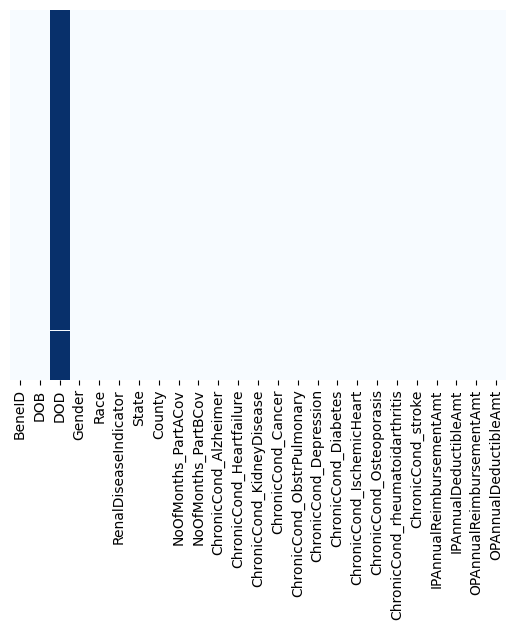

In [8]:
#calling the .head() function above shows some nulls in the column DOD. Checking for other nulls.
sns.heatmap(df_train_ben.isnull(),yticklabels=False,cbar=False,cmap='Blues');

In [9]:
#checking the non-null values in the DOD column
df_train_ben['DOD'].unique()

array([nan, '2009-12-01', '2009-09-01', '2009-05-01', '2009-07-01',
       '2009-08-01', '2009-10-01', '2009-06-01', '2009-04-01',
       '2009-02-01', '2009-11-01', '2009-03-01'], dtype=object)

In [10]:
#the data above looks like it's only by month, no day appears to be recorded for date of death. Checking DOB to see if that is intentional
df_train_ben['DOB'].unique()

array(['1943-01-01', '1936-09-01', '1936-08-01', '1922-07-01',
       '1935-09-01', '1976-09-01', '1940-09-01', '1934-02-01',
       '1929-06-01', '1936-07-01', '1914-03-01', '1934-05-01',
       '1927-12-01', '1938-04-01', '1936-03-01', '1919-09-01',
       '1940-06-01', '1939-10-01', '1924-05-01', '1939-01-01',
       '1958-08-01', '1931-02-01', '1942-07-01', '1938-01-01',
       '1940-03-01', '1941-12-01', '1928-12-01', '1944-12-01',
       '1937-10-01', '1912-07-01', '1946-03-01', '1965-04-01',
       '1940-04-01', '1919-12-01', '1959-11-01', '1922-10-01',
       '1919-01-01', '1953-12-01', '1919-10-01', '1911-01-01',
       '1927-01-01', '1922-12-01', '1938-07-01', '1963-10-01',
       '1932-02-01', '1929-05-01', '1958-07-01', '1957-11-01',
       '1939-12-01', '1931-01-01', '1933-02-01', '1948-12-01',
       '1930-05-01', '1924-12-01', '1943-10-01', '1944-09-01',
       '1925-07-01', '1964-05-01', '1965-10-01', '1920-04-01',
       '1948-11-01', '1954-11-01', '1936-10-01', '1933-

In [11]:
#only month, so without being able to verify with a SEM, I'll have to assume the null values in the DOD column indicate that patient is still living

In [12]:
#changing DOD and DOB to datetime data types
df_train_ben['DOD'] = pd.to_datetime(df_train_ben['DOD'], format='%Y-%m-%d')
df_train_ben['DOB'] = pd.to_datetime(df_train_ben['DOB'], format='%Y-%m-%d')